In [54]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared,RationalQuadratic,WhiteKernel

def f(t):
    """The function to predict."""
    T=30
    t = t.T[0]
    phi = (2*np.pi)/T*t
    r = 10+2*np.sin(phi*5)**2*0
    x = r * np.sin(phi)+(t/20)
    y = r * np.cos(phi)+(t/10)
    return x,y

# ax = np.random.rand(5)-0.5
# ay = np.random.rand(5)-0.5
# def f(t):
#     t_powers = np.vander(np.array(t).flatten(),5)[:,::-1]
#     x = t_powers@ax
#     y = t_powers@ay
#     if len(x)==1:
#         x = x[0]
#         y = y[0]
#     return x,y


2

Name : GP regression
Objective : 228.265472922797
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |   546.3859511970027  |      +ve      |        
  rbf.lengthscale          |  12.597618890223872  |      +ve      |        
  Gaussian_noise.variance  |  0.2877037767939294  |      +ve      |        


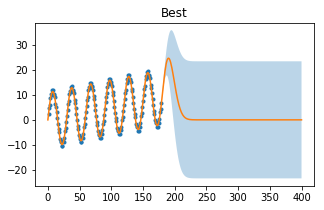

In [35]:
### BEGIN Solution
import GPy
from matplotlib import pyplot
from sklearn.metrics import r2_score
%matplotlib inline

def plot_model(X, y, model,plot_range,title = ""):
    print(model)
    
    x = np.linspace(*plot_range, 400).reshape(-1, 1)
    prediction_mean, prediction_var = model.predict(x)
    prediction_std = np.sqrt(prediction_var).ravel()
    prediction_mean = prediction_mean.ravel()
    
    pyplot.figure(figsize=(5, 3))
    y = y[(plot_range[0]<X)&(X<plot_range[1])]
    X = X[(plot_range[0]<X)&(X<plot_range[1])]
    pyplot.title(title)
    pyplot.plot(X, y, '.', label='Train data')
    pyplot.plot(x, prediction_mean, label='Prediction')
    pyplot.fill_between(x.ravel(), prediction_mean - prediction_std, prediction_mean + prediction_std, alpha=0.3)
    pyplot.show()
    
t_ = np.arange(0,180)
x_,_= f(t_)
print(x_[:,np.newaxis].ndim)
k_trend = GPy.kern.Poly(1, order=1)
k_seasonal = GPy.kern.Linear(1)+GPy.kern.StdPeriodic(1)
kernel =  k_seasonal
model = GPy.models.GPRegression(t_[:,np.newaxis], x_[:,np.newaxis])
model.optimize(max_iters = 40)

plot_model(t_, x_[:,np.newaxis], model,(0,400),"Best")


### END Solution

In [55]:

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

def create_graph(name):
    plt.ion()
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.set_title(name,fontsize=30)
    hunter_line, = ax.plot(0, 0, 'r-',label = 'Hunter trajectory')
    hunter_position_point, = ax.plot(0, 0, 'r*',label = 'Hunter position')
    victim_line, = ax.plot(0, 0, 'g-',label = 'Victim trajectory')
    victim_position_point, = ax.plot(0, 0, 'g*',label = 'Victim position')
    
    ax.legend()
    graph = (hunter_line,hunter_position_point,victim_line,victim_position_point),fig, ax
    return graph

def update_graph(graph,hunter_trajectoty,victim_trajectoty):
    (hunter_line,hunter_position_point,victim_line,victim_position_point),fig, ax = graph
    x = np.r_[hunter_trajectoty[0],victim_trajectoty[0]]
    y = np.r_[hunter_trajectoty[1],victim_trajectoty[1]]
    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())
    hunter_line.set_data(*hunter_trajectoty)
    hunter_position_point.set_data(*hunter_trajectoty.T[-1])
    victim_line.set_data(*victim_trajectoty)
    victim_position_point.set_data(*victim_trajectoty.T[-1])
    fig.canvas.draw()
    #sleep(0.01)

def finish_graph(graph,t):
    (hunter_line,hunter_position_point,victim_line,victim_position_point),fig, ax = graph
    ax.set_title('Prey has caught in '+str(t)+' steps',fontsize=30)
    fig.canvas.draw()
    
def model_hunter_learnong(name,hunter_policy,victim_policy, hunter_start_position, victim_strat_position, catch_distance = 1):
    graph = create_graph(name)
    t = 0
    hunter_trajectoty = np.array([hunter_start_position])
    victim_trajectoty = np.array([victim_strat_position])
    while True:
        hunter_position = hunter_policy(hunter_trajectoty,victim_trajectoty,t)
        victim_position = victim_policy(hunter_trajectoty,victim_trajectoty,t)
        hunter_trajectoty = np.r_[hunter_trajectoty,[hunter_position]]
        victim_trajectoty = np.r_[victim_trajectoty,[victim_position]]
        update_graph(graph,hunter_trajectoty.T,victim_trajectoty.T)
        t +=1
        diatance = np.linalg.norm(hunter_position-victim_position)
        if diatance<=catch_distance:
            finish_graph(graph,t)
            return
            
        


In [76]:
def simple_hunter_policy(hunter_trajectoty,victim_trajectoty,t):
    hunter_position = hunter_trajectoty[-1]
    victim_position = victim_trajectoty[-1]
    velocity = 2
    victim_direction = (victim_position-hunter_position)/np.linalg.norm(victim_position-hunter_position)
    best_direction = (victim_position-hunter_position)
    if np.linalg.norm(best_direction)>=velocity:
        new_hunter_position = hunter_position+best_direction/np.linalg.norm(best_direction)*velocity
    else:
        new_hunter_position = np.array(best_hunter_position)
    return new_hunter_position

def simple_victim_policy(hunter_trajectoty,victim_trajectoty,t):
    def f(t):
        phi = (2*np.pi)/30*t
        r = 10+2*np.sin(phi*2)**2*1

        x = r * np.sin(phi)+(t/20)
        y = r * np.cos(phi)+(t/10)
        return x,y
    new_victim_position = f(t)
    return new_victim_position
        


<IPython.core.display.Javascript object>


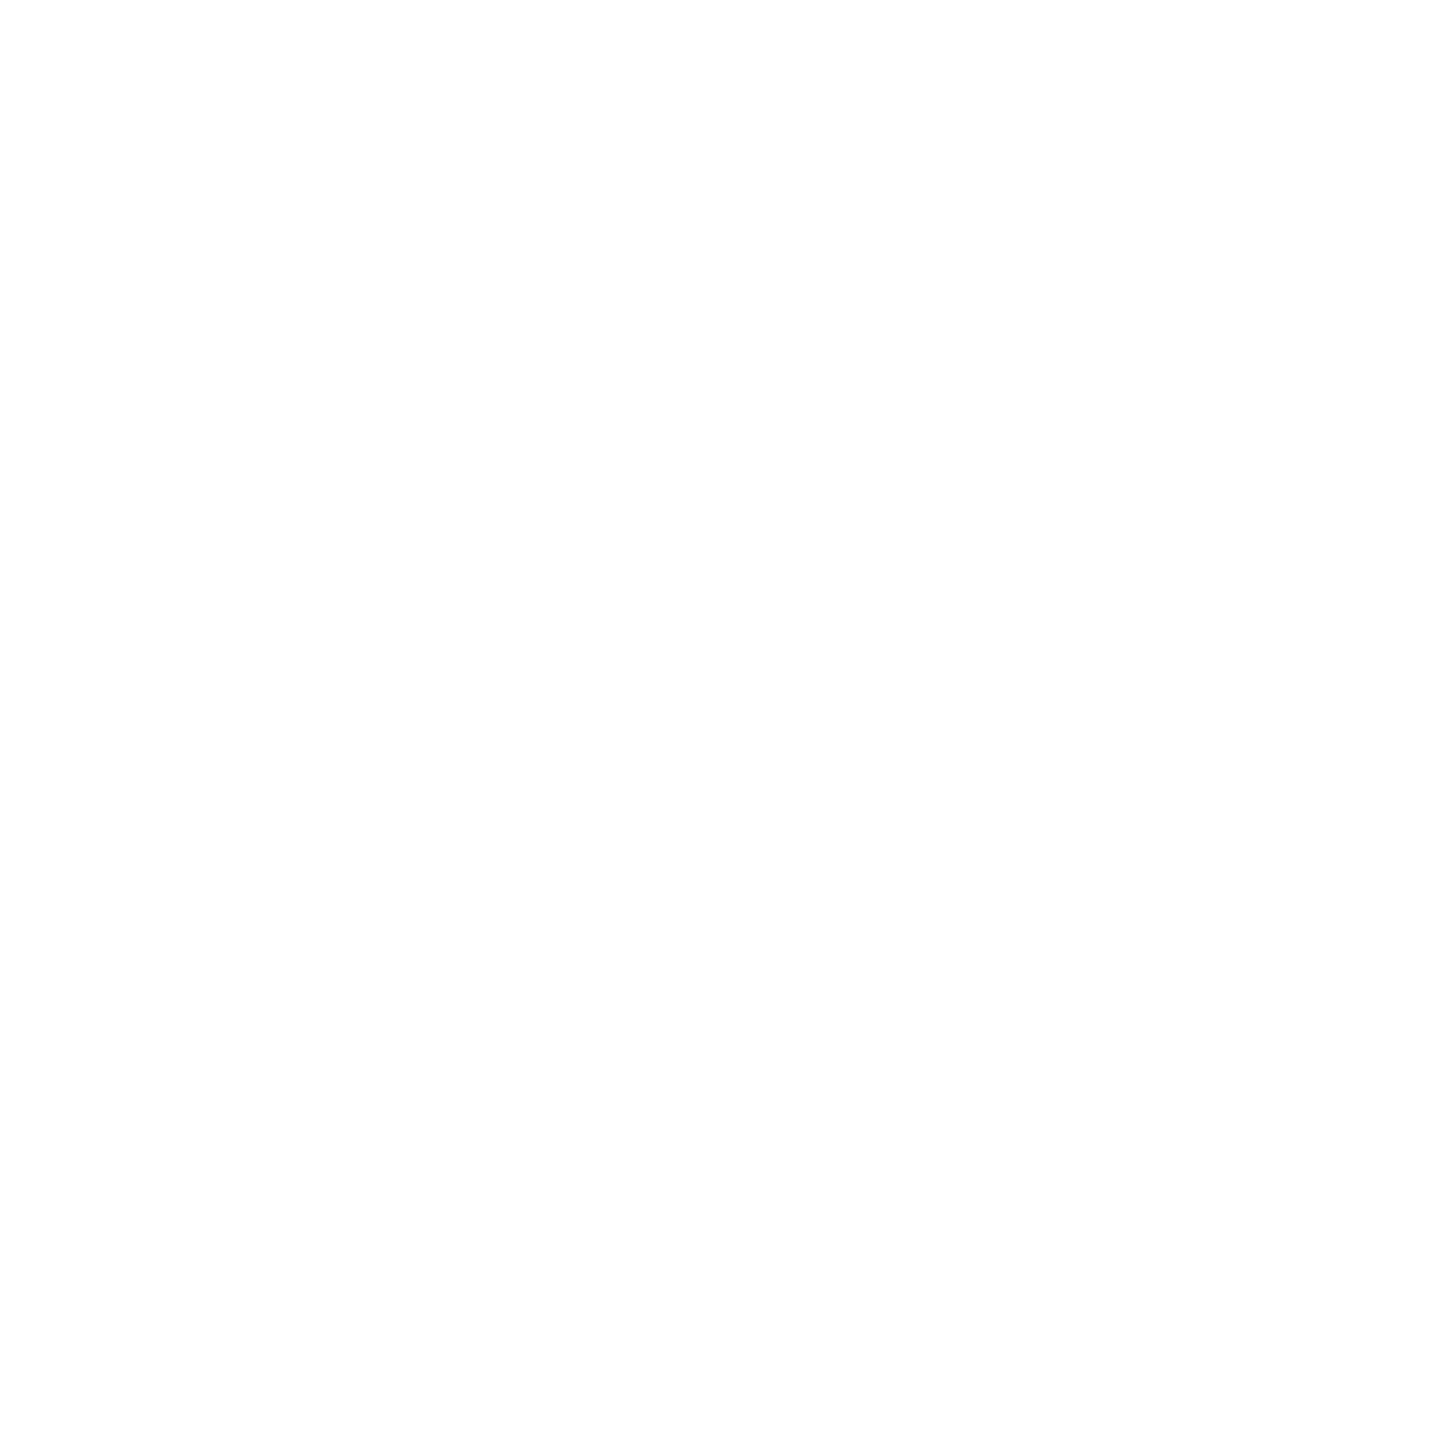

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


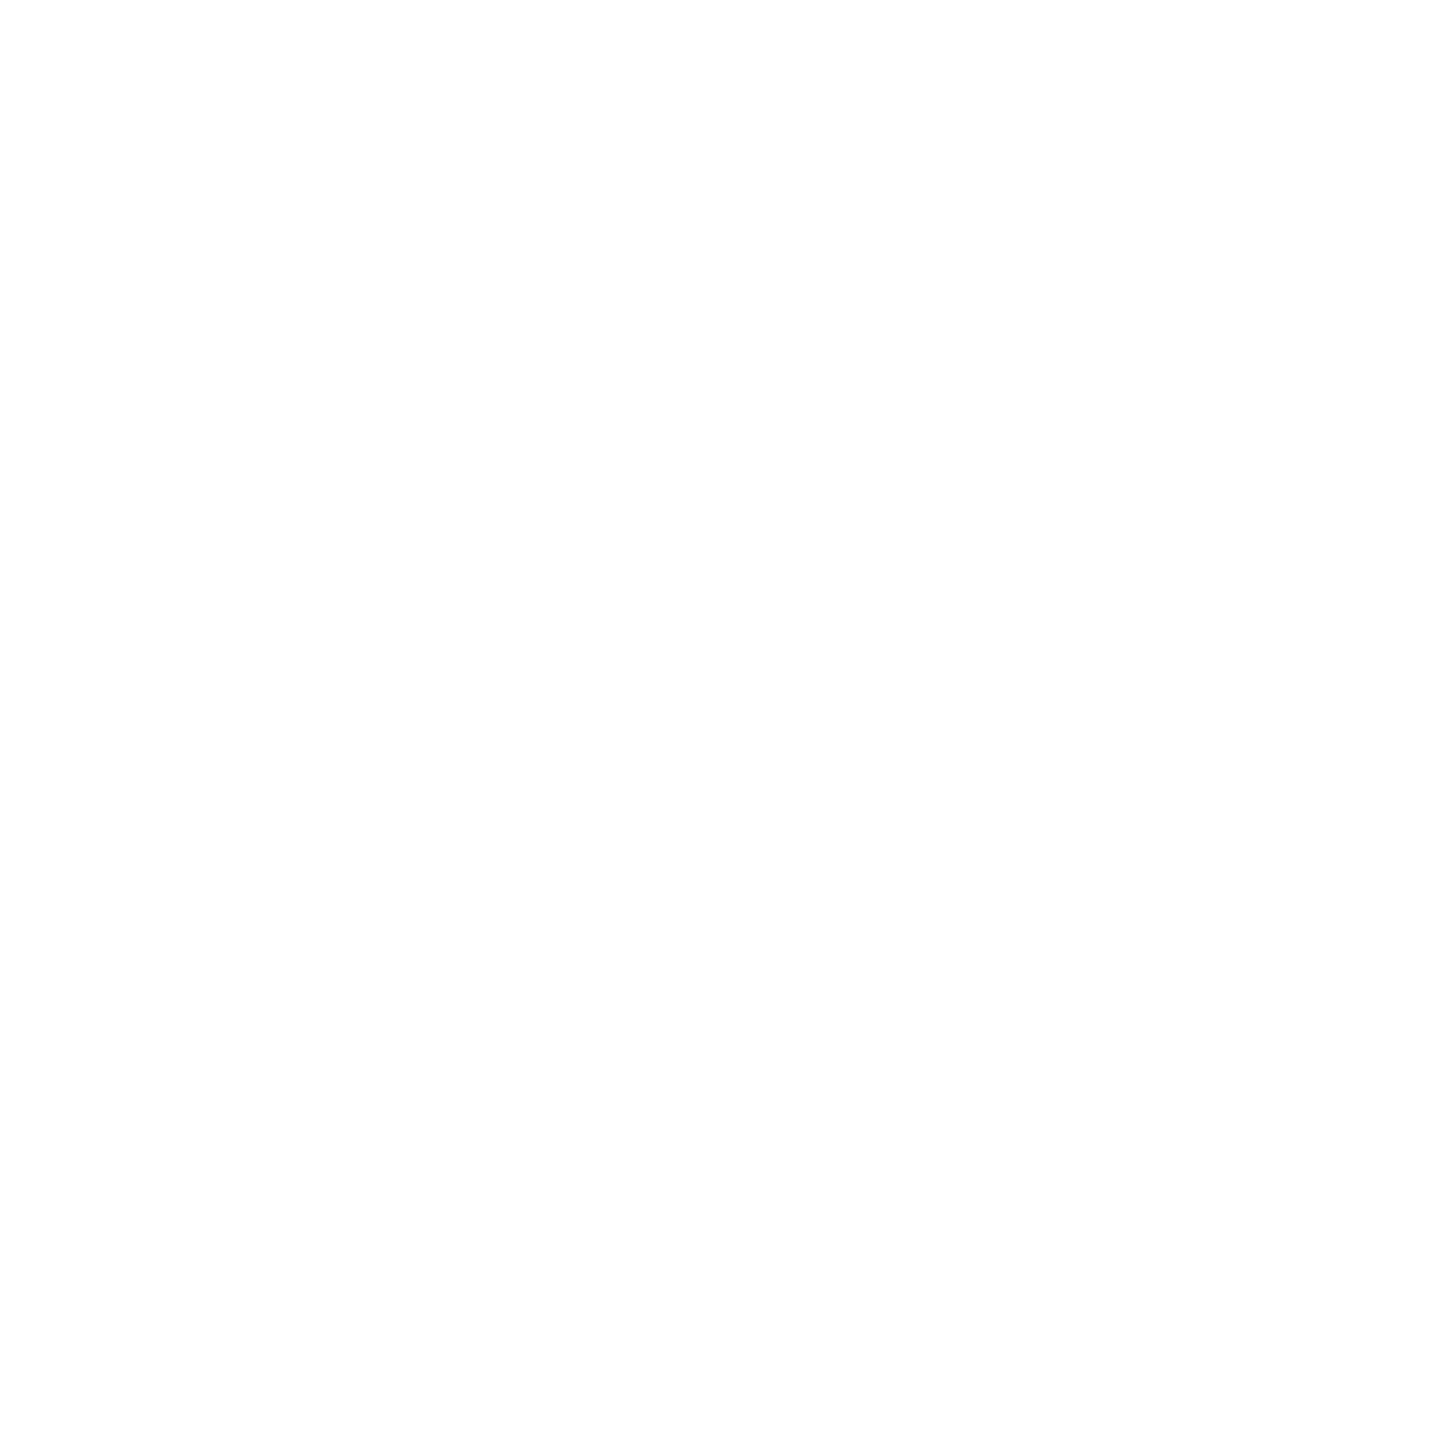

In [73]:
model_hunter_learnong('Go to current position',simple_hunter_policy,simple_victim_policy,[0,0],[10,10],catch_distance=1)

In [62]:
import findiff
from scipy.special import factorial


def get_grad(victim_trajectoty):
    num_points = len(victim_trajectoty.T)
    if num_points == 1:
        multipliers=[0]
        elements = [-1]
    if num_points == 2:
        multipliers = [-1,1]
        elements = [-2,-1]
    if num_points >2:
        acc = min(num_points-1,6)
        if num_points >= 4:
            acc-=1
        coefs = findiff.coefficients(deriv=1, acc=acc)['backward']
        multipliers = coefs['coefficients']
        elements = coefs['offsets']-1
    x,y  = victim_trajectoty
    dx,dy =x[elements]@multipliers, y[elements]@multipliers
    return dx,dy

def get_hes(victim_trajectoty):
    num_points = len(victim_trajectoty.T)
    if num_points < 3:
        multipliers=[0]
        elements=[-1]
    if num_points == 3:
        multipliers = [1,-2,1]
        elements = [-3,-2,-1]
    if num_points > 3:
        acc = min(num_points-2,6)
        if num_points >= 5:
            acc-=1
        coefs = findiff.coefficients(deriv=2, acc=acc)['backward']
        multipliers = coefs['coefficients']
        elements = coefs['offsets']-1
    x,y  = victim_trajectoty
    d2x, d2y =  x[elements]@multipliers, y[elements]@multipliers
    return d2x,d2y

def get_victim_approximant(victim_trajectoty):
    dx,dy = get_grad(victim_trajectoty)
    d2x,d2y = get_hes(victim_trajectoty)
    def victim_approximant(t):
        x0,y0 = victim_trajectoty.T[-1]
        approx_x = x0+dx*t+d2x*t**2/2
        approx_y = y0+dy*t+d2y*t**2/2
        approx_victim_position = approx_x,approx_y
        return approx_victim_position
    return victim_approximant




def get_approximant(trajectoty,order = 2):
    x,y = trajectoty
    def approximant(t):
        if isinstance(t, (int, float, complex)):
            t = [t]
        else:
            t = t.flatten()
        t_powers = np.vander(t,len(dnx))[:,::-1]
        approx_x = t_powers@x_tailor_multipliers
        approx_y = t_powers@y_tailor_multipliers
        if len(t)==1:
            approx_x = approx_x[0]
            approx_y = approx_y[0]
        return approx_x, approx_y

    dnx = []
    dny = []
    for n in range(order+1):
        try:
            coefs = findiff.coefficients(deriv=n, acc=6)['backward']
            multipliers = coefs['coefficients']
            elements = coefs['offsets']-1
            dnx += x[elements]@multipliers,
            dny += y[elements]@multipliers,
        except:
            break
    x_tailor_multipliers = (1/factorial(np.arange(0,len(dnx))))*dnx
    y_tailor_multipliers = (1/factorial(np.arange(0,len(dnx))))*dny
    return approximant


def hunter_distance(hunter_position, new_position):
    return np.linalg.norm(np.array(hunter_position)-np.array(new_position))


def get_hunter_success(hunter_position,victim_approximant,velocity):

    def hunter_success(t):
        approx_victim_position = victim_approximant(t)
        objective_hunter_position = approx_victim_position
        hunter_time_to_position = hunter_distance(hunter_position, objective_hunter_position)/velocity
        return -(t - hunter_time_to_position)**2
    return hunter_success

from scipy.optimize import minimize,minimize_scalar
def find_best_hunter_position(hunter_position,victim_trajectoty,velocity):
    victim_approximant = get_victim_approximant(victim_trajectoty)
#     ad_victim_approximant = get_approximant(victim_trajectoty)
#     print(victim_approximant(4),ad_victim_approximant(4))


    hunter_success = get_hunter_success(hunter_position,victim_approximant,velocity)
    t = np.linspace(0,20,100)
    success = [hunter_success(ti) for ti in t]
    best_t = t[np.argmax(success)]
    best_hunter_position = victim_approximant(best_t)
    return best_hunter_position
    
    

def parabolic_hunter_policy(hunter_trajectoty,victim_trajectoty,t):
    victim_trajectoty = victim_trajectoty.T
    velocity = 0.5
    hunter_position = hunter_trajectoty[-1]
    best_hunter_position = find_best_hunter_position(hunter_position,victim_trajectoty,velocity)
    
    best_direction = (np.array(best_hunter_position)-np.array(hunter_position))
    if np.linalg.norm(best_direction)>=velocity:
        new_hunter_position = hunter_position+best_direction/np.linalg.norm(best_direction)*velocity
    else:
        new_hunter_position = np.array(best_hunter_position)
    return new_hunter_position

        



<IPython.core.display.Javascript object>


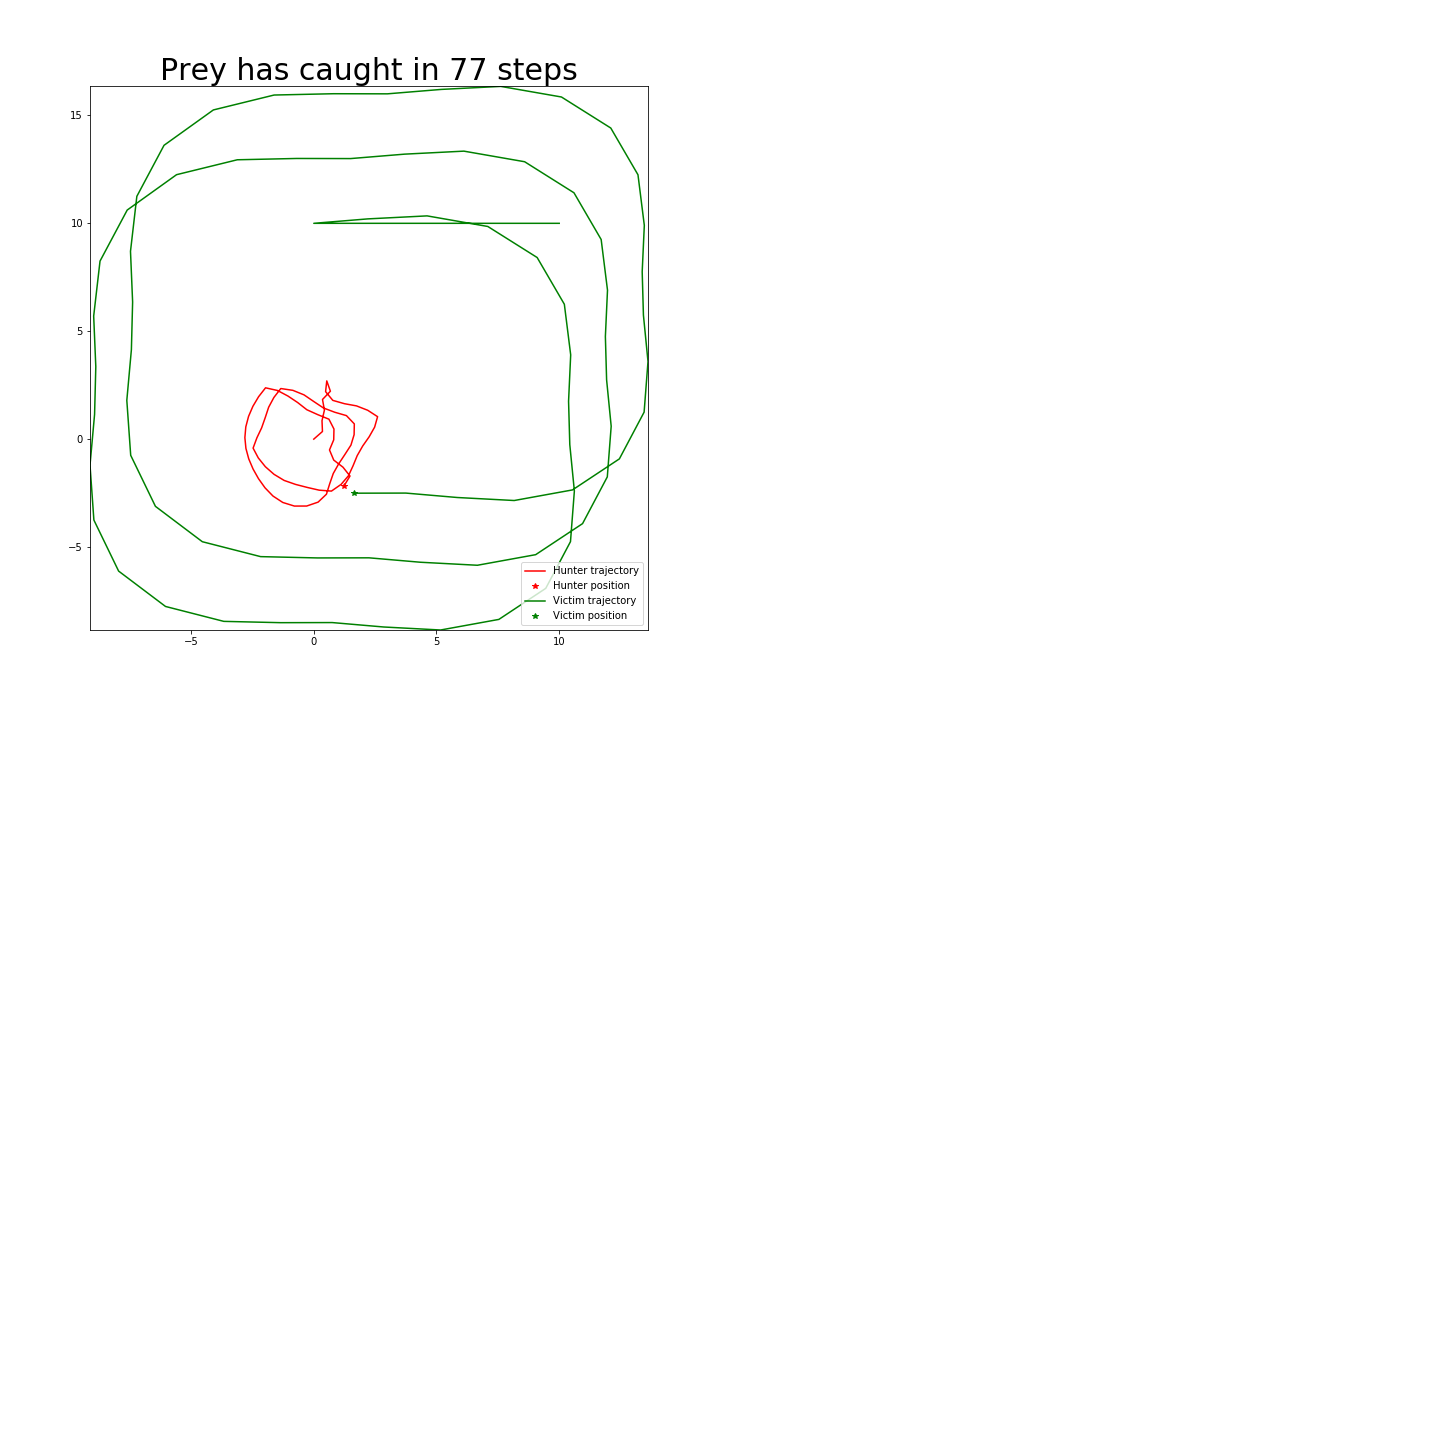

<IPython.core.display.Javascript object>


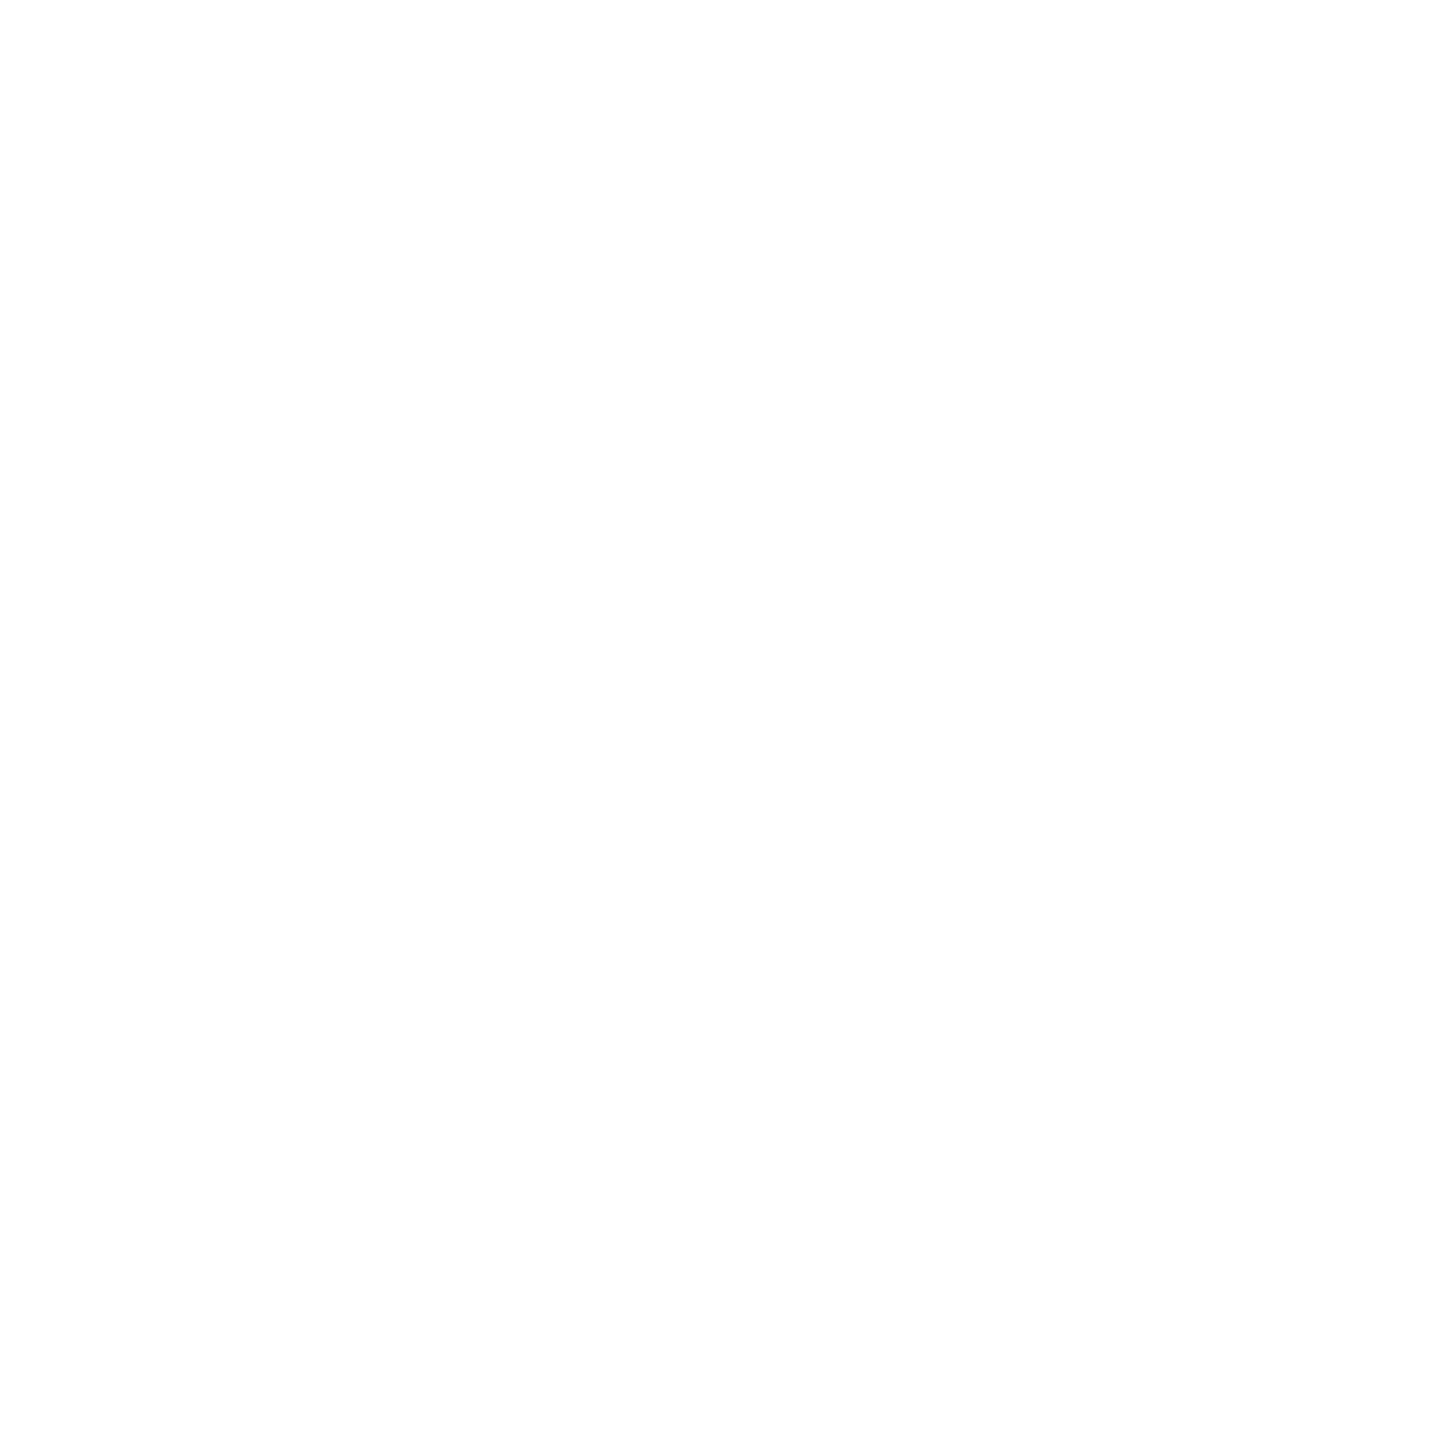

In [66]:
%matplotlib notebook
model_hunter_learnong('Go to parabolic closest trajectory',parabolic_hunter_policy,simple_victim_policy,[0,0],[10,10],catch_distance=1)



In [67]:
def hunter_distance(hunter_position, new_position):
    return np.linalg.norm(np.array(hunter_position)-np.array(new_position))


def get_hunter_success(hunter_position,victim_approximant,velocity):

    def hunter_success(t):
        approx_victim_position = victim_approximant(t)
        objective_hunter_position = approx_victim_position
        hunter_time_to_position = hunter_distance(hunter_position, objective_hunter_position)/velocity
        return -(t - hunter_time_to_position+5)**2
    return hunter_success

from scipy.optimize import minimize,minimize_scalar
def find_best_hunter_position(hunter_position,victim_trajectoty,velocity):
    victim_approximant = get_victim_approximant(victim_trajectoty)
#     ad_victim_approximant = get_approximant(victim_trajectoty)
#     print(victim_approximant(4),ad_victim_approximant(4))


    hunter_success = get_hunter_success(hunter_position,victim_approximant,velocity)
    t = np.linspace(0,20,100)
    success = [hunter_success(ti) for ti in t]
    best_t = t[np.argmax(success)]
    best_hunter_position = victim_approximant(best_t)
    return best_hunter_position

def parabolic_leading_policy(hunter_trajectoty,victim_trajectoty,t):
    victim_trajectoty = victim_trajectoty.T
    velocity = 2
    hunter_position = hunter_trajectoty[-1]
    best_hunter_position = find_best_hunter_position(hunter_position,victim_trajectoty,velocity)
    
    best_direction = (np.array(best_hunter_position)-np.array(hunter_position))
    if np.linalg.norm(best_direction)>=velocity:
        new_hunter_position = hunter_position+best_direction/np.linalg.norm(best_direction)*velocity
    else:
        new_hunter_position = np.array(best_hunter_position)
    return new_hunter_position




<IPython.core.display.Javascript object>


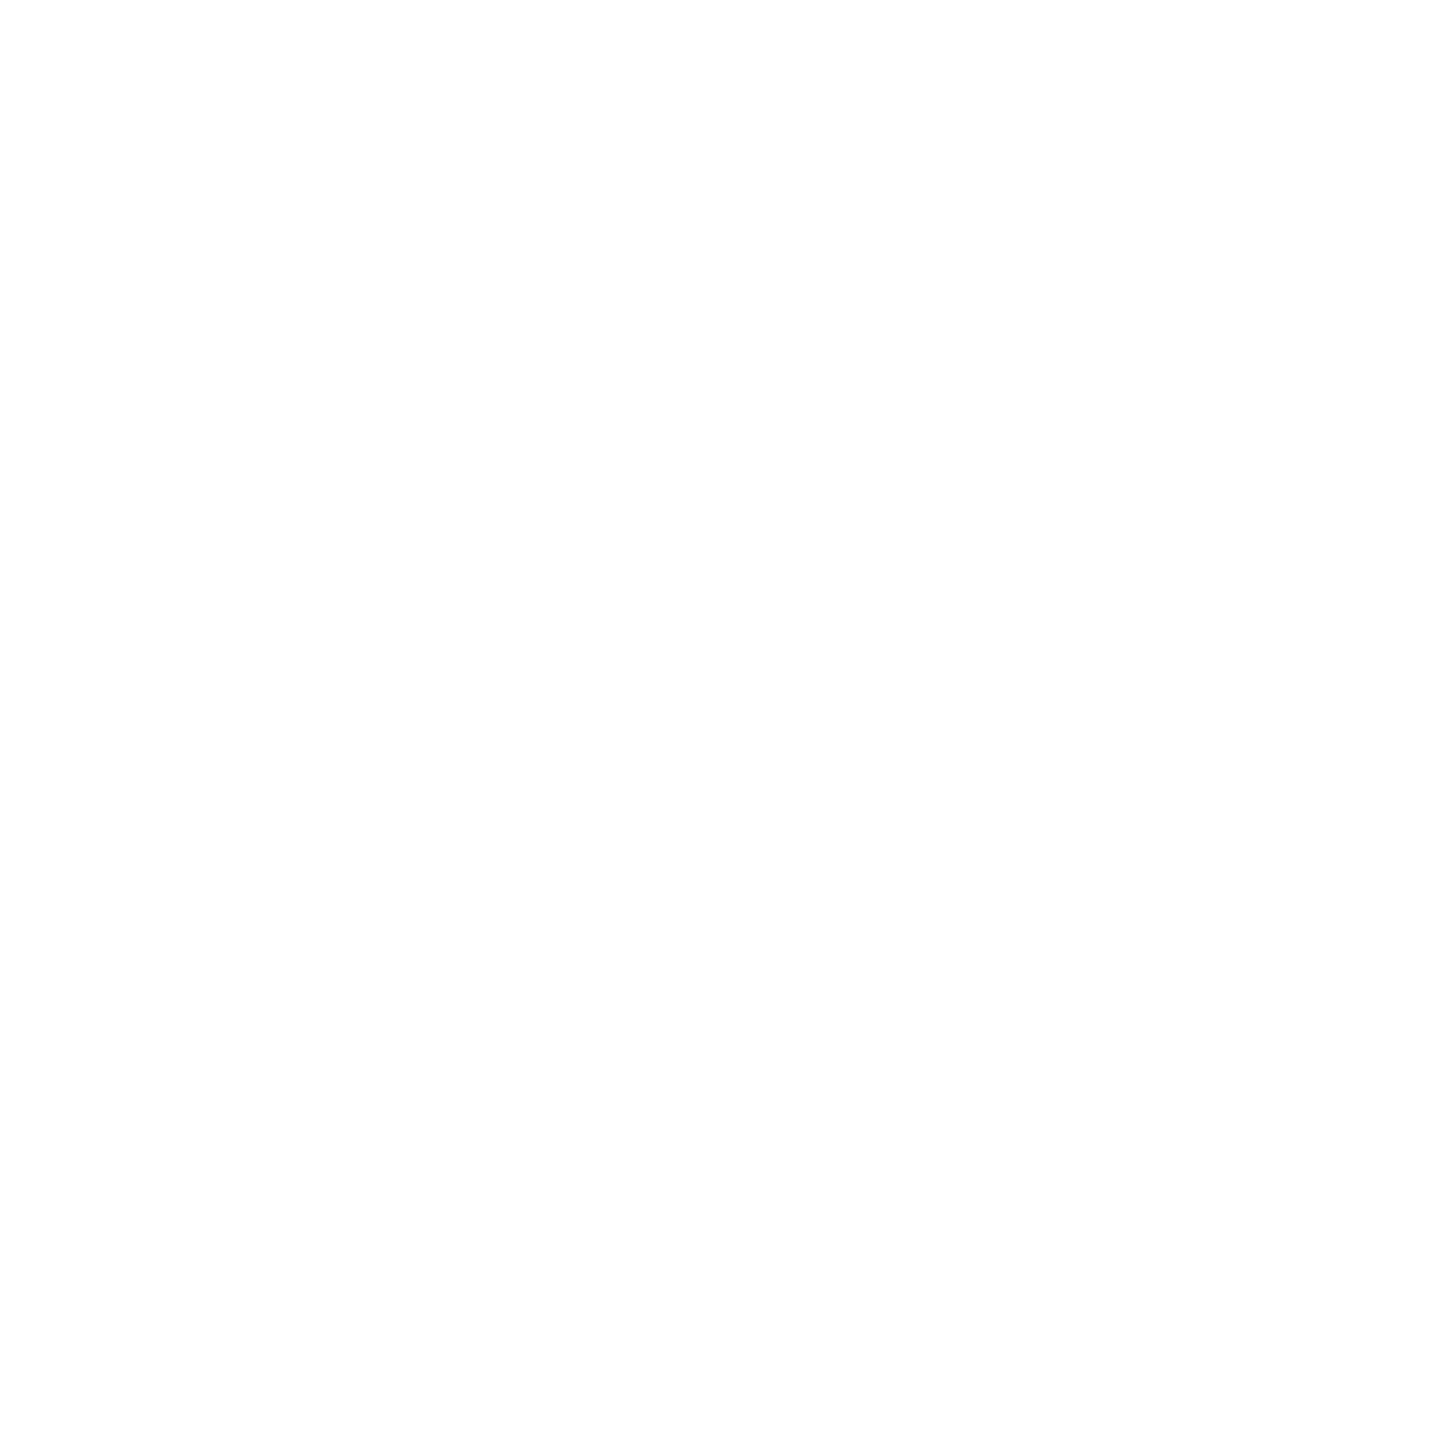

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


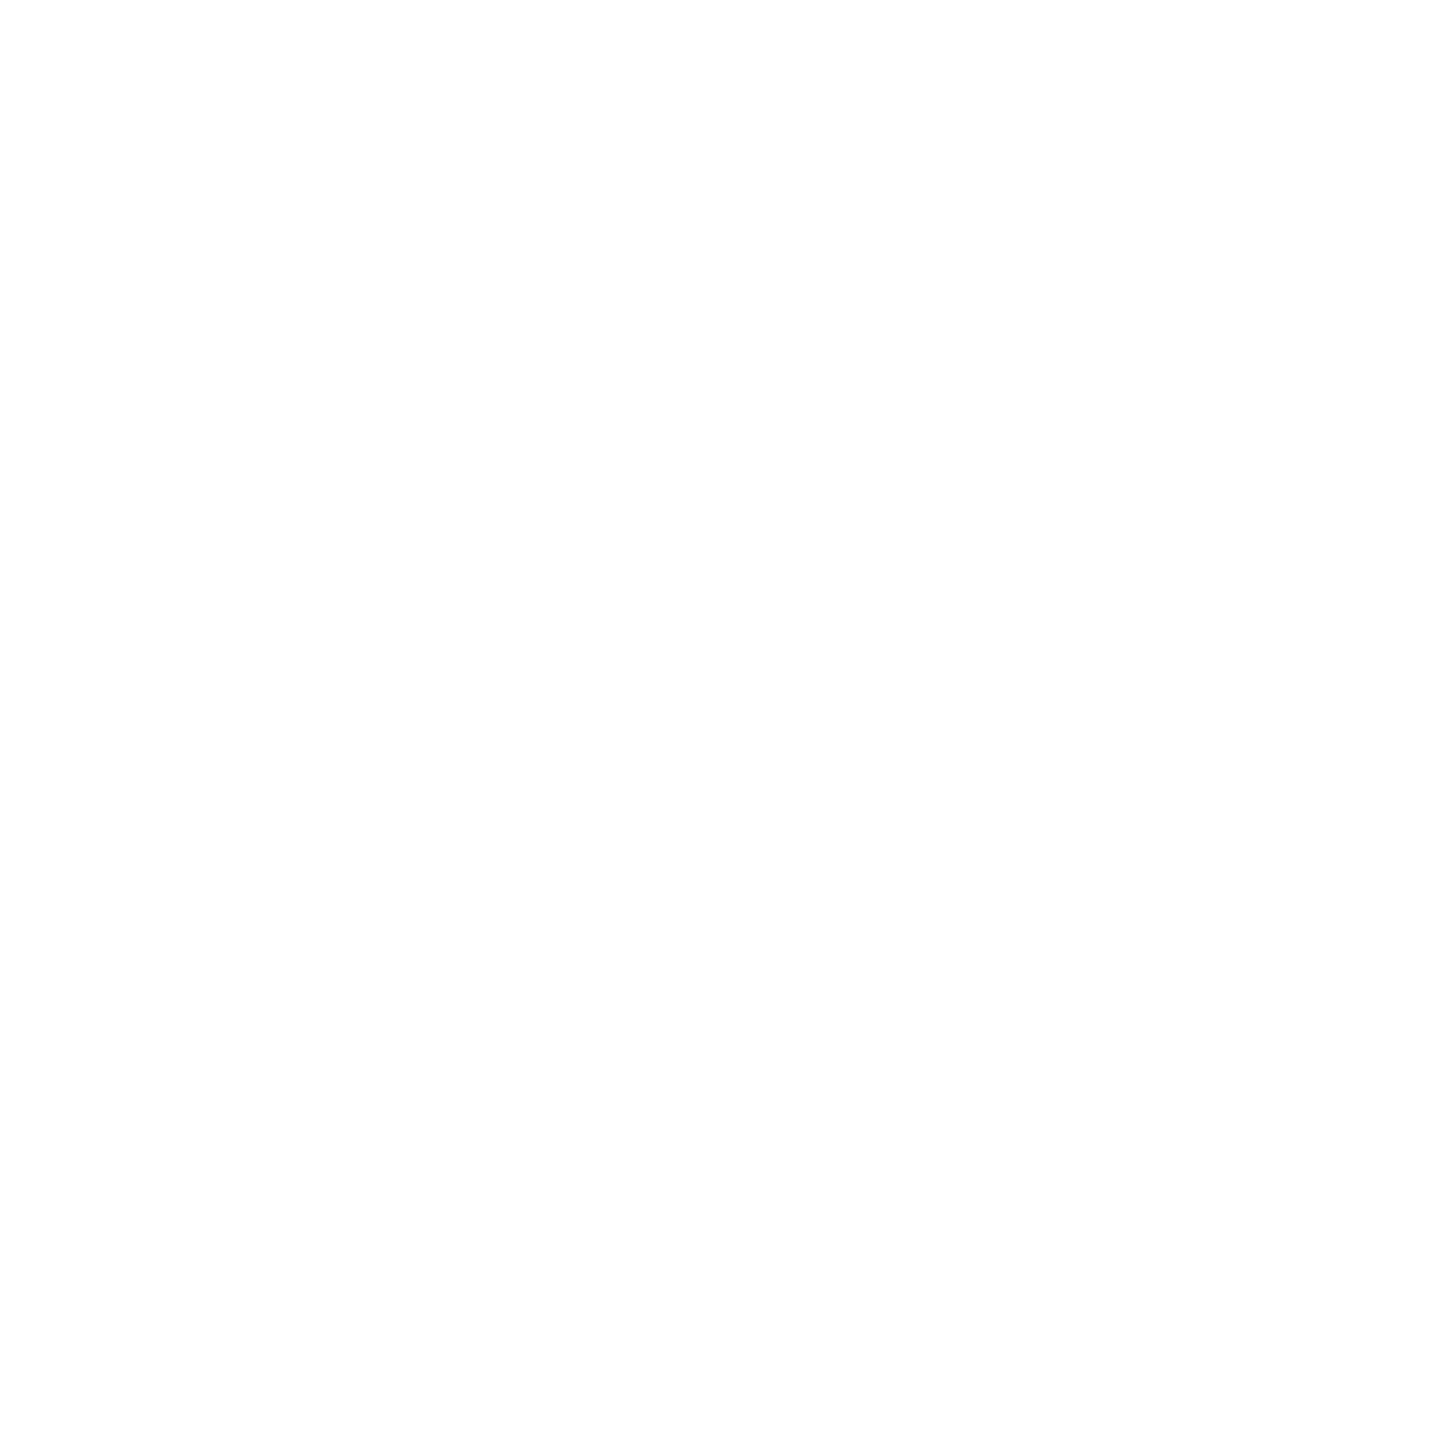

In [77]:
%matplotlib notebook
model_hunter_learnong('Go to parabolic closest trajectory to lead',parabolic_leading_policy,simple_victim_policy,[0,0],[10,10],catch_distance=1)



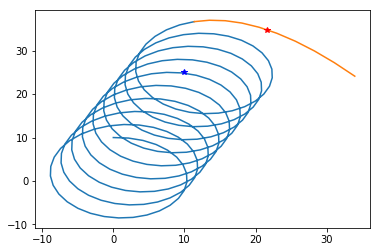

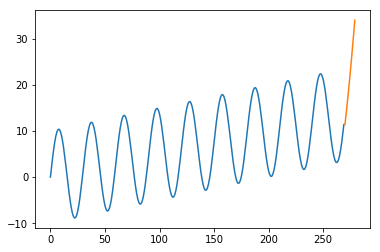

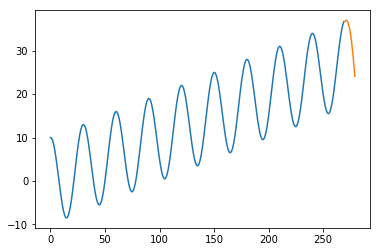

In [139]:
%matplotlib inline


n_max = 270
t = np.arange(0,n_max)[:,np.newaxis]
x,y = f(t)

t_new = np.arange(n_max,n_max+10)[:,np.newaxis]
approx = get_approximant(np.array([x,y]))
approx_x,approx_y = approx(t_new-n_max)

pos = [10,25]

best_pos = find_best_hunter_position(pos,np.array([x,y]),1)

plt.plot(x,y)
plt.plot(approx_x,approx_y)
plt.plot(*pos,'b*')
plt.plot(*best_pos,'r*')
plt.show()
plt.plot(t,x)
plt.plot(t_new,approx_x)
plt.show()
plt.plot(t,y)
plt.plot(t_new,approx_y)
plt.show()

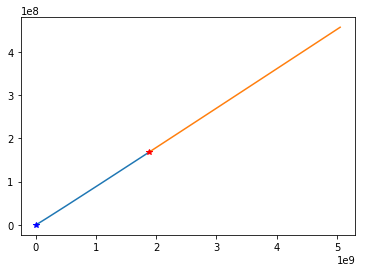

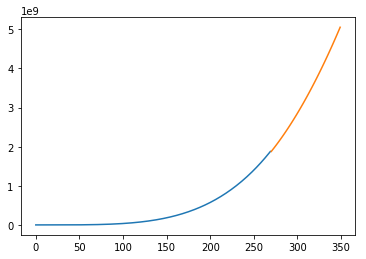

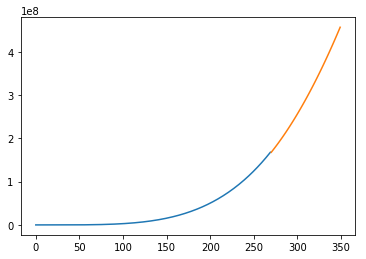

In [186]:

n_max = 270
t = np.arange(0,n_max)[:,np.newaxis]
x,y = f(t)

t_new = np.arange(n_max,n_max+80)[:,np.newaxis]
approx = get_approximant(np.array([x,y]))
approx_x,approx_y = approx(t_new-n_max)

pos = [10,25]

best_pos = find_best_hunter_position(pos,np.array([x,y]),1)

plt.plot(x,y)
plt.plot(approx_x,approx_y)
plt.plot(*pos,'b*')
plt.plot(*best_pos,'r*')
plt.show()
plt.plot(t,x)
plt.plot(t_new,approx_x)
plt.show()
plt.plot(t,y)
plt.plot(t_new,approx_y)
plt.show()

In [56]:
def optimal_approximant()

array([[    1,     1,     1,     1,     1,     1,     1,     1,     1,
            1],
       [    1,     2,     4,     8,    16,    32,    64,   128,   256,
          512],
       [    1,     3,     9,    27,    81,   243,   729,  2187,  6561,
        19683]])

In [43]:
# def get_coefs(t):
#     coeffs = np.array([1/2*(2 + 3 *t + t**2),-t*(2 + t),1/2 *t*(1 + t)])
    
#     return coeffs
import scipy

def get_cf(t,n):
    coefs = [((-1)**i)*(factorial(n + t - 1)/((i + t)*factorial(i)*factorial(n - i - 1)*factorial(t - 1))) for i in range(n)] 
    return coefs


def get_coefs(ts,n=3):
    if isinstance(ts, (int, float, complex)):
        ts = [ts]
    coeffs_array = []
    for t in ts:
#         A = np.array([[(t+j-1)**(i-1) for j in range(1,n+1)] for i in range(1,n+1)])
#         print(np.linalg.cond(A))
#         one = np.zeros(n)
#         one[0]=1
#         coeffs = np.linalg.solve(A,one)
        coeffs = get_cf(t,n)
        coeffs_array+=coeffs,
    elements = -np.arange(1,n+1)
    if len(coeffs_array)==1:
        coeffs_array = coeffs_array[0]
    return np.array(coeffs_array).T,elements

def get_modified_approximant(trajectoty,order = 3):
    x,y = trajectoty
    def approximant(t):
        coefs,elements = get_coefs(t.flatten(),order)
        approx_x = x[elements]@coefs
        approx_y = y[elements]@coefs

        return approx_x, approx_y
    return approximant

c,_ =  get_coefs(1,20)#,get_coefs2(2,20)
c

array([ 2.00000e+01, -1.90000e+02,  1.14000e+03, -4.84500e+03,
        1.55040e+04, -3.87600e+04,  7.75200e+04, -1.25970e+05,
        1.67960e+05, -1.84756e+05,  1.67960e+05, -1.25970e+05,
        7.75200e+04, -3.87600e+04,  1.55040e+04, -4.84500e+03,
        1.14000e+03, -1.90000e+02,  2.00000e+01, -1.00000e+00])

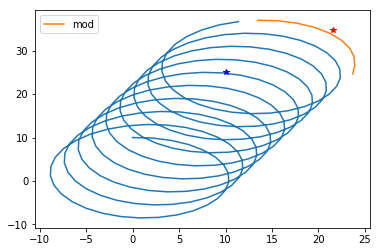

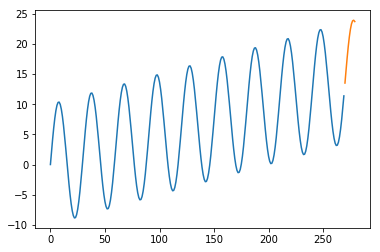

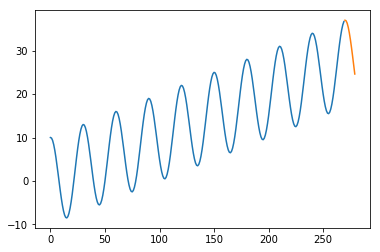

In [53]:
%matplotlib inline


n_max = 270
t = np.arange(0,n_max)[:,np.newaxis]
x,y = f(t)

t_new = np.arange(n_max,n_max+10)[:,np.newaxis]
approx = get_modified_approximant(np.array([x,y]),22)
approx2 = get_victim_approximant(np.array([x,y]))
approx_x,approx_y = approx(t_new-n_max+1)
approx_x2,approx_y2 = approx2(t_new-n_max+1)
pos = [10,25]

best_pos = find_best_hunter_position(pos,np.array([x,y]),1)

plt.plot(x,y)
plt.plot(approx_x,approx_y,label = 'mod')
# plt.plot(approx_x2,approx_y2,label = 'simple')
plt.legend()
plt.plot(*pos,'b*')
plt.plot(*best_pos,'r*')
plt.show()
plt.plot(t,x)
plt.plot(t_new,approx_x)
plt.show()
plt.plot(t,y)
plt.plot(t_new,approx_y)
plt.show()

In [345]:
from scipy.special import iv

def get_min_var_approximant(trajectoty,order = 3):
    x,y = trajectoty
    def approximant(t):
        coefs,elements = get_min_var_coefs(t.flatten(),order)
        approx_x = x[elements]@coefs
        approx_y = y[elements]@coefs

        return approx_x, approx_y
    return approximant

def get_min_var_coefs(ts,n=3):
    coeffs_array = []
    ts = np.array(ts).flatten()
    for t in ts:
        CtC =np.array([[iv(0,2*np.sqrt(-1+i+t)*np.sqrt(-1+j+t)) for j in range(1,n+1)] for i in range(1,n+1)])
        print(np.linalg.cond(CtC))
        C1 = np.ones(n)
        a = np.linalg.solve(CtC+0*np.eye(n),C1)
#         print(np.linalg.norm(a))
        coeffs_array+=a,
    if len(coeffs_array)==1:
        coeffs_array = coeffs_array[0]
    elements = -np.arange(1,n+1)
    return np.array(coeffs_array).T, elements
get_min_var_coefs(1,n=4)

10234.95908597283


(array([ 1.9579823 , -1.63069773,  0.63846311, -0.09731477]),
 array([-1, -2, -3, -4]))

2888979850146.698
18775217527857.836
95864828527940.05
377802466374768.8
1227777468591018.0
3462065046279854.5
8788352096212360.0
2.026245626871076e+16
4.399119364144074e+16
8.959424706313141e+16


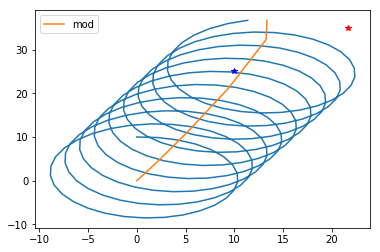

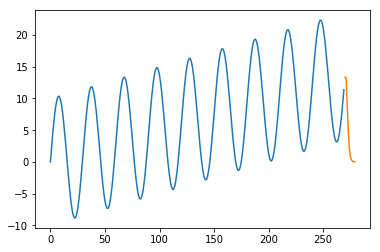

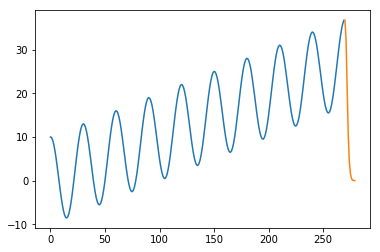

In [322]:
%matplotlib inline


n_max = 270
t = np.arange(0,n_max)[:,np.newaxis]
x,y = f(t)

t_new = np.arange(n_max,n_max+10)[:,np.newaxis]
approx = get_min_var_approximant(np.array([x,y]),10)
approx2 = get_victim_approximant(np.array([x,y]))
approx_x,approx_y = approx(t_new-n_max+1)
approx_x2,approx_y2 = approx2(t_new-n_max+1)
pos = [10,25]

best_pos = find_best_hunter_position(pos,np.array([x,y]),1)

plt.plot(x,y)
plt.plot(approx_x,approx_y,label = 'mod')
# plt.plot(approx_x2,approx_y2,label = 'simple')
plt.legend()
plt.plot(*pos,'b*')
plt.plot(*best_pos,'r*')
plt.show()
plt.plot(t,x)
plt.plot(t_new,approx_x)
plt.show()
plt.plot(t,y)
plt.plot(t_new,approx_y)
plt.show()

In [6]:
from scipy.special import iv
# minimization of coefficient norm
def get_semi_min_var_approximant(trajectoty,num_points=3,num_zerod = 1):
    x,y = trajectoty
    def approximant(t):
        coefs,elements = get_semi_min_var_coefs(t.flatten(),num_points,num_zerod)
        approx_x = x[elements]@coefs
        approx_y = y[elements]@coefs

        return approx_x, approx_y
    return approximant

def get_semi_min_var_coefs(ts,num_points=3,num_zerod = 1):
    coeffs_array = []
    ts = np.array(ts).flatten()
    for t in ts:
        C = np.array([[(t+j-1)**(i-1)/factorial(i-1) for j in range(1,num_points+1)] for i in range(1,num_zerod+1)])
        CCt = C@C.T
        print(t)
        one = np.zeros(num_zerod)
        one[0]=1
        L = np.linalg.cholesky(CCt+1e-6*np.eye(num_zerod))
        print(np.linalg.cond(L))
        z = np.linalg.solve(L,one)
        y = np.linalg.solve(L.T,z)
        a = C.T@y
        coeffs_array+=a,
    if len(coeffs_array)==1:
        coeffs_array = coeffs_array[0]
    elements = -np.arange(1,num_points+1)
    return np.array(coeffs_array).T, elements
coef,_ = get_semi_min_var_coefs(10,21,10)
coef

10
83231800446.67754


array([  55.18215173, -100.56036717,  -16.1342489 ,   54.16047612,
         53.69968527,   10.20249753,  -32.03828604,  -45.24698917,
        -26.88529052,    6.57489673,   32.59639057,   35.51253706,
         14.53808799,  -15.94055793,  -34.16266192,  -24.50733548,
          8.69239711,   35.8077945 ,   17.48087183,  -42.49216819,
         13.72956587])

1
20846.226621401645
2
42156.261372962406
3
79493.89656592884
4
141585.92607892223
5
240707.19549432406
6
393741.03652488417
7
623460.7694322102
8
960060.9456675982
9
1442964.7857178908
10
2122930.5821048836


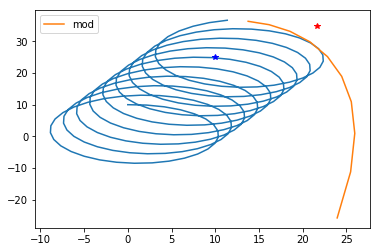

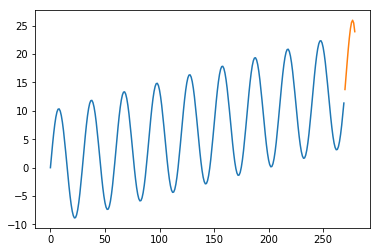

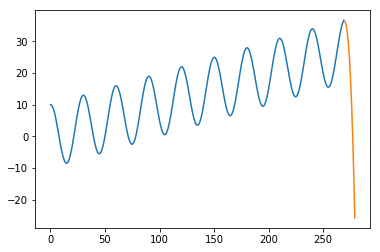

In [9]:
%matplotlib inline


n_max = 270
t = np.arange(0,n_max)[:,np.newaxis]
x,y = f(t)

t_new = np.arange(n_max,n_max+10)[:,np.newaxis]
approx = get_semi_min_var_approximant(np.array([x,y]),20,5)

approx2 = get_victim_approximant(np.array([x,y]))
approx_x,approx_y = approx(t_new-n_max+1)
approx_x2,approx_y2 = approx2(t_new-n_max+1)
pos = [10,25]

best_pos = find_best_hunter_position(pos,np.array([x,y]),1)

plt.plot(x,y)
plt.plot(approx_x,approx_y,label = 'mod')
# plt.plot(approx_x2,approx_y2,label = 'simple')
plt.legend()
plt.plot(*pos,'b*')
plt.plot(*best_pos,'r*')
plt.show()
plt.plot(t,x)
plt.plot(t_new,approx_x)
plt.show()
plt.plot(t,y)
plt.plot(t_new,approx_y)
plt.show()

In [129]:
from scipy.special import iv
# minimization of mean squere of series

def get_min_ser_var_approximant(trajectoty,order = 3):
    x,y = trajectoty
    def approximant(t):
        coefs,elements = get_min_ser_var_coefs(t.flatten(),order)
        approx_x = x[elements]@coefs
        approx_y = y[elements]@coefs

        return approx_x, approx_y
    return approximant

def get_min_ser_var_coefs(ts,num_sumples=3):
    coeffs_array = []
    ts = np.array(ts).flatten()
    for t in ts:
        CtC =np.array([[iv(0,2*np.sqrt(-1+i+t)*np.sqrt(-1+j+t)) for j in range(1,num_sumples+1)] for i in range(1,num_sumples+1)])
#         print(np.linalg.cond(CtC))
#         ones = np.ones(num_sumples)
        
#         L = np.linalg.cholesky(CtC+1e-9*np.eye(num_sumples))
#         print(np.linalg.cond(L))
        one = np.ones(num_sumples)
#         one = np.zeros(num_sumples)
#         one[0]=1
#         z = np.linalg.solve(L,one)
#         a = np.linalg.solve(L.T,z)
        a = np.linalg.solve(CtC+0*np.eye(num_sumples),one)
        coeffs_array+=a,
    if len(coeffs_array)==1:
        coeffs_array = coeffs_array[0]
    elements = -np.arange(1,num_sumples+1)
    return np.array(coeffs_array).T, elements
get_min_ser_var_coefs(1,3)


(array([ 1.42702882, -0.79389189,  0.15684781]), array([-1, -2, -3]))

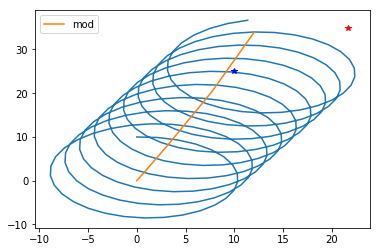

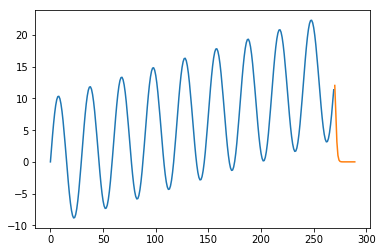

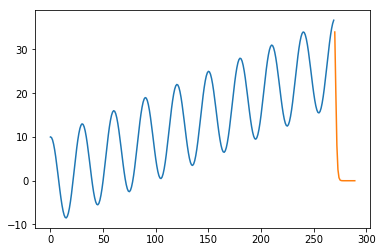

In [130]:
%matplotlib inline


n_max = 270
t = np.arange(0,n_max)[:,np.newaxis]
x,y = f(t)

t_new = np.arange(n_max,n_max+20)[:,np.newaxis]
approx = get_min_ser_var_approximant(np.array([x,y]),5)

approx2 = get_victim_approximant(np.array([x,y]))
approx_x,approx_y = approx(t_new-n_max+1)
approx_x2,approx_y2 = approx2(t_new-n_max+1)
pos = [10,25]

best_pos = find_best_hunter_position(pos,np.array([x,y]),1)

plt.plot(x,y)
plt.plot(approx_x,approx_y,label = 'mod')
# plt.plot(approx_x2,approx_y2,label = 'simple')
plt.legend()
plt.plot(*pos,'b*')
plt.plot(*best_pos,'r*')
plt.show()
plt.plot(t,x)
plt.plot(t_new,approx_x)
plt.show()
plt.plot(t,y)
plt.plot(t_new,approx_y)
plt.show()

In [101]:
num_sumples = 6
t=1
CtC =np.array([[iv(0,2*np.sqrt(-1+i+t)*np.sqrt(-1+j+t)) for j in range(1,num_sumples+1)] for i in range(1,num_sumples+1)])
print(CtC.shape)
np.linalg.eig(CtC)


(6, 6)


(array([2.18784325e+04, 3.76026342e+02, 1.69292737e+01, 1.50853743e+00,
        1.21718547e-01, 3.59784512e-03]),
 array([[ 0.00140258, -0.03274769, -0.25419783,  0.67615965,  0.63727847,
          0.2664458 ],
        [ 0.00844906, -0.11956793, -0.48928386,  0.43842769, -0.4055568 ,
         -0.62413001],
        [ 0.03495031, -0.30315213, -0.5902673 , -0.15680457, -0.35235288,
          0.64009496],
        [ 0.11783216, -0.57037358, -0.25536526, -0.46617483,  0.50808633,
         -0.34656523],
        [ 0.34739293, -0.6738463 ,  0.51449189,  0.32396184, -0.21467359,
          0.09752639],
        [ 0.92959069,  0.3366527 , -0.13287575, -0.06108492,  0.0317933 ,
         -0.01131182]]))

In [124]:
num_points = 8
num_zerod = 20
C = np.array([[(t+j-1)**(i-1)/factorial(i-1) for j in range(1,num_points+1)] for i in range(1,num_zerod+1)])
C.T[:,:num_points].shape,C.T[:,num_points+1:].shape


(np.linalg.inv(C.T[:,:num_points])@C.T[:,num_points+1:]).shape


(8, 11)